# Part I. Eigenface Approach for Face Recognition (SVD)

- Dataset: The Face Dataset, with 10 classes / 640 images
- Approach to learn: the Eigenface Method, Singular Value Decomposition(SVD)

c:\users\celix\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  app.launch_new_instance()


traind data: (540, 2500) with label (540,)
test data: (100, 2500) with label (100,)

A sample image visualized for the trianing set 
(above) and the test set (below):


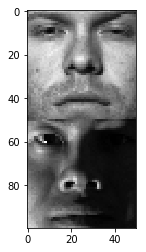

In [2]:
import numpy as np
from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
import random
%matplotlib inline


img_size = 50
n_samples = 540
n_test = 100
# import datasets:: The Face Dataset
def load(loading_path):
    train_labels, train_data = [], []
    for line in open(loading_path):
        im = misc.imread(line.strip().split()[0])
        train_data.append(im.reshape(-1,))
        train_labels.append(line.strip().split()[1])
    train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)
    
    return train_data, train_labels

X_train, y_train = load('./faces/train.txt')
X_test, y_test = load('./faces/test.txt')
print ("traind data: {} with label {}".format(X_train.shape, y_train.shape))
print ("test data: {} with label {}".format(X_test.shape, y_test.shape))
print ("\nA sample image visualized for the trianing set \n(above) and the test set (below):")
img2 = np.concatenate((X_train[10, :].reshape(img_size,img_size), 
                       X_test[10, :].reshape(img_size,img_size)), axis=0)
plt.imshow(img2, cmap = cm.Greys_r)
plt.show()


The average face 
(averaging each feature across all training samples)


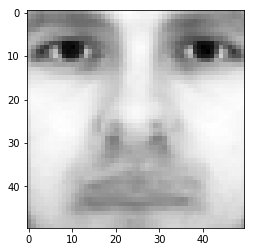

In [3]:
# Average face through columns 
X_mu = X_train.mean(axis=0)
print ("\nThe average face \n(averaging each feature across all training samples)")
plt.imshow(X_mu.reshape((img_size, img_size)), cmap = cm.Greys_r)
plt.show()

Image after mean substraction operation, a sample from picked train set (above) and test set (below)


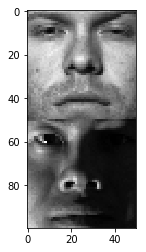

In [4]:
# Mean substraction
X_train_new = X_train - X_mu
X_test_new = X_test - X_mu
print ("Image after mean substraction operation, a sample from picked train set (above) and test set (below):")
img2_norm = np.concatenate((X_train_new[10, :].reshape(img_size,img_size), X_test_new[10, :].reshape(img_size,img_size)), axis=0)
plt.imshow(img2, cmap = cm.Greys_r)
plt.show()

**(e).SVD**

Now we perform the *Singular Value Decomposition(SVD)* on the training set $X_{train}$:

\begin{equation*}
X_{train} = U\hspace{1mm}Σ\hspace{1mm}V^{T}
\end{equation*}

to get matrix $V^{T}$,  where each row of $V^{T}$ has the same dimension as the face image (where in this case is (n_samples, 2500))
Then, we could refer to v i , the $i^{th}$ row of $V^{T}$ , $v_{i}^{T}$ as **$i^{th}$ eigenface**.

The dimension $A = n$x$p$ and $r$ = $min(n, p)$, then $U = n$x$r$, $Σ = r$x$r$, $V^{T}=r$x$p$

Obtained from SVD: u shape=(540, 540), s shape=(540,), vt shape=(540, 2500)
Display the first 10 eigenfaces vt in grayscale.


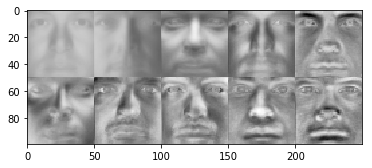

In [5]:
# Eigenface (SVD)
u, s, vh = np.linalg.svd(X_train_new, full_matrices=False)

print("Obtained from SVD: u shape={}, s shape={}, vt shape={}".format(u.shape, s.shape, vh.shape))
print ("Display the first 10 eigenfaces vt in grayscale.")
eigen10 = [vh[i].reshape((img_size, img_size)) for i in range(10)]
eigen10_m = np.zeros(shape=(img_size*2, img_size*5))
for i in range(10):
    eigen10_m[i//5*img_size:i//5*img_size+img_size][:, i%5*img_size:i%5*img_size+img_size] = eigen10[i]
plt.imshow(eigen10_m, cmap = cm.Greys_r)
plt.show()

**(f). Low rank approximation**

$Σ$ is a diagonal matrix with non-negative real numbers on the diagonal in non-ascending order, we can use the first $r$ elements in $Σ$ together with first $r$ columns in $U$ and first $r$ rows in $V^{T}$ to approximate $X$. That is, We can approximate X by

\begin{equation}
\hat{X_{r}} = U[:,: r] \hspace{1.5mm} Σ[: r,: r] \hspace{1.5mm} V^{T} [: r,:]
\end{equation}

The matrix $\hat{X_{r}}$ is called **rank-$r$ approximation of $X$**. 

Below, we tried $r$ = $1,2,3...200$, reconstructed the image and ploted each approximation error computed by *Frobenius Norm*: 

\begin{equation}
loss ||A||_{F} = \sqrt{\sum\limits_{i=1}^m \sum\limits_{i=1}^n |a_{ij}|^2}, 
\hspace{5mm} where\hspace{2mm} A = ||X-\hat{X_{r}}|| 
\end{equation}

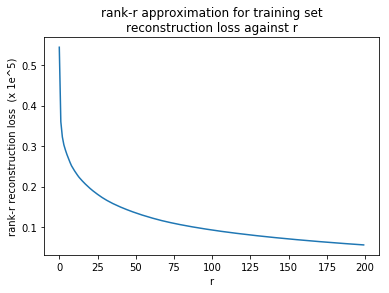

In [9]:
# Low Rand Approximation
# rank-r approximation error
r_loss = []
for r in range(1,201):
    u_r, s_r, vh_r = u[:,:r], s[:r], vh[:r,:]
    X_r = np.dot(u_r * s_r, vh_r)
    r_loss.append(np.linalg.norm(X_train_new - X_r))
    
plt.plot(np.array(r_loss)/100000)
plt.xlabel("r")
plt.ylabel("rank-r reconstruction loss  (x 1e^5)")
plt.title("rank-r approximation for training set\nreconstruction loss against r")
plt.show()


**(g). Eigenface Features**

The top $r$ eigenfaces 

\begin{equation}
V^{T}[:r,:] = \{v_{1} ,v_{2} ,...,v_{r}\}^{T}
\end{equation}

span an $r$-dimensional
linear subspace of the original image space called **face space**, whose origin is the average face
*µ* computed above, and whose axes are the eigenfaces $\{v_{1} ,v_{2} ,...,v_{r}\}$. 

We could represent a 2500-dimensional face image $z$ as an ** $r$-dimensional feature vector $f$ **: 

\begin{equation}
f = V^{T}[: r,:] \hspace{1mm} z = [v_{1} ,v_{2} ,...,v_{r}]^{T}\hspace{1mm}z
\end{equation}

Now we generate the $r$-dimensional feature
matrix $F$ and $F_{test}$ for training images $X$ and test images $X_{test}$, respectively:

In [14]:
# r-dimensinoal feature vector f
def f_vector(X, r):
    """
    Calculate r-dimensional feature vector f
    Args: 
        X: original image data, shape: nxp
        r: r value
    Return:
        f_vector, shape nxr
    """
    __, __, vh = np.linalg.svd(X, full_matrices=True)  # vh shape: min(n,p)xp
    vhr = np.transpose(vh[:r,:])   # pxr
    return np.dot(X, vhr)          # nxp dot pxr

**(h). Face Recognition wiht logictis regression**

In [16]:
F_train = f_vector(X_train_new, r=10)
F_test = f_vector(X_test_new, r=10)
print (F_train.shape)
print (F_test.shape)

(540, 10)
(100, 10)


In [17]:
# OLS
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(F_train, y_train)
acc_test = model.score(F_test, y_test)
print ("The test accuracy of training logistic \nregression model on F features of X is:\n{} % ".format(acc_test*100))

The test accuracy of training logistic 
regression model on F features of X is:
23.0 % 


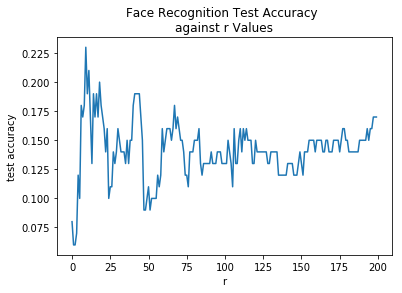

In [147]:
Train across r = [1,200]
acc_test_r = []
for r in range(1,201):
    f_train = f_vector(X_train_new, r=r)
    f_test = f_vector(X_test_new, r=r)
    score = LogisticRegression(multi_class="ovr").fit(f_train, y_train).score(f_test, y_test)
    acc_test_r.append(score)

plt.plot(np.array(acc_test_r))
plt.xlabel("r")
plt.ylabel("test accuracy")
plt.title("Face Recognition Test Accuracy \nagainst r Values")
plt.show()
